# Exploring Costa Rican Households

In [1]:
#Write a report, what I'm doing, why I'm doing it, who I'm doing it for

## Define the Problem

How can we more accurately classify the poverty levels of Costa Rican households using observeable attributes, ie education level, monthly rent, building materials, or assets, in order to predict their level of need? In order to assess the accuracy of any predictive model built, an F1 score will be used to evaluate its predictiveness.

## Identify Client

The client is the Inter-American Development Bank, who wants to assess income qualification for families in need within Costa Rica.

## Describe Dataset and How it was Cleaned/Wrangled

Dataset has 143 columns. Each record describes an individual living in Costa Rica, with attributes mostly relating to their household descriptions, education level, and location.

We filled in the missing values, 

## Explain initial findings

In [2]:
#import necessaries libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Preparation 

In [3]:
file_sample = 'sample_submission.csv'
file_test = 'test.csv'
file_train = 'train.csv'
sns.set()

In [4]:
sample = pd.read_csv(file_sample)

In [5]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Data columns (total 2 columns):
Id        23856 non-null object
Target    23856 non-null int64
dtypes: int64(1), object(1)
memory usage: 372.8+ KB


In [6]:
sample.sample(10)

,Id,Target
13303,ID_0bc4de344,4
14897,ID_527ecd7f4,4
8851,ID_831a06bca,4
13923,ID_ccf896498,4
1491,ID_4964cbf37,4
20902,ID_bf3f1f892,4
21086,ID_1a33dd9d0,4
17815,ID_8c9018b6e,4
5301,ID_b08e953aa,4
10288,ID_49b468bdf,4


In [7]:
test = pd.read_csv(file_test)
print ("Test Dataset: Rows, Columns: ", test.shape)

Test Dataset: Rows, Columns:  (23856, 142)


In [8]:
test.head(20)

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,...,4,0,16,9,0,1,2.250000,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,...,41,256,1681,9,0,1,2.250000,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,...,41,289,1681,9,0,1,2.250000,0.25,272.25,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,...,59,256,3481,1,256,0,1.000000,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,...,18,121,324,1,0,1,0.250000,64.00,NaN,324
5,ID_e77d38d45,400000.0,0,3,0,1,1,1,1.0,0,...,38,256,1444,4,0,0,1.000000,0.00,182.25,1444
6,ID_3c5f4bd51,400000.0,0,3,0,1,1,1,1.0,0,...,42,121,1764,4,0,0,1.000000,0.00,182.25,1764
7,ID_a849c29bd,300000.0,0,6,0,1,1,1,1.0,0,...,21,196,441,4,0,0,0.250000,0.00,196.00,441
8,ID_472fa82da,300000.0,0,6,0,1,1,1,1.0,0,...,22,196,484,4,0,0,0.250000,0.00,196.00,484
9,ID_24864adcc,NaN,0,6,0,1,1,0,NaN,0,...,70,100,4900,1,0,0,0.111111,64.00,100.00,4900


In [9]:
train = pd.read_csv(file_train)
print ("Train Dataset: Rows, Columns: ", train.shape)

Train Dataset: Rows, Columns:  (9557, 143)


In [10]:
#set index
train.index = train['Id'].values
test.index = test['Id'].values

#### Train Dataset

In [11]:
train.sample(10)

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
ID_981bfa8d3,ID_981bfa8d3,NaN,0,5,0,1,1,0,NaN,0,...,144,484,9,0,0,1.000000,0.250000,100.0000,484,3
ID_8fedf9ddd,ID_8fedf9ddd,NaN,0,5,0,1,1,1,1.0,0,...,1,64,9,49,1,2.250000,0.250000,42.2500,64,4
ID_0f5d1745c,ID_0f5d1745c,NaN,0,6,0,1,1,0,NaN,0,...,121,784,25,81,1,1.562500,0.062500,110.2500,784,4
ID_2d1da2a82,ID_2d1da2a82,120000.0,0,4,0,1,1,0,NaN,1,...,81,676,16,64,4,4.000000,1.000000,72.2500,676,1
ID_555192753,ID_555192753,NaN,1,3,0,1,1,0,NaN,1,...,64,225,16,0,4,16.000000,1.000000,20.2500,225,3
ID_fce8e1468,ID_fce8e1468,NaN,0,5,0,1,1,1,1.0,0,...,121,3249,9,121,0,1.000000,0.000000,152.1111,3249,4
ID_38e7b45b6,ID_38e7b45b6,175000.0,0,4,0,1,1,0,NaN,1,...,36,169,16,121,4,4.000000,1.000000,100.0000,169,3
ID_8b801f2a4,ID_8b801f2a4,50000.0,0,5,0,1,1,0,NaN,0,...,36,1024,16,81,0,1.777778,0.000000,81.0000,1024,3
ID_8b4a684ed,ID_8b4a684ed,NaN,0,4,0,1,1,0,NaN,1,...,0,36,25,0,1,2.777778,0.444444,18.0625,36,4
ID_e3fcbd183,ID_e3fcbd183,70000.0,0,5,0,1,1,1,1.0,1,...,64,961,16,64,4,1.777778,1.000000,72.2500,961,3


In [12]:
train.describe()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
count,2.697000e+03,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,2215.000000,9557.000000,9557.000000,...,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000,9557.000000
mean,1.652316e+05,0.038087,4.955530,0.023648,0.994768,0.957623,0.231767,1.404063,0.385895,1.559171,...,74.222769,1643.774302,19.132887,53.500262,3.844826,3.249485,3.900409,102.588867,1643.774302,3.302292
std,1.504571e+05,0.191417,1.468381,0.151957,0.072145,0.201459,0.421983,0.763131,0.680779,1.036574,...,76.777549,1741.197050,18.751395,78.445804,6.946296,4.129547,12.511831,93.516890,1741.197050,1.009565
min,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,1.000000
25%,8.000000e+04,0.000000,4.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,16.000000,289.000000,9.000000,0.000000,0.000000,1.000000,0.111111,36.000000,289.000000,3.000000
50%,1.300000e+05,0.000000,5.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,36.000000,961.000000,16.000000,36.000000,1.000000,2.250000,0.444444,81.000000,961.000000,4.000000
75%,2.000000e+05,0.000000,6.000000,0.000000,1.000000,1.000000,0.000000,2.000000,1.000000,2.000000,...,121.000000,2601.000000,25.000000,81.000000,4.000000,4.000000,1.777778,134.560010,2601.000000,4.000000
max,2.353477e+06,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,6.000000,5.000000,8.000000,...,441.000000,9409.000000,169.000000,441.000000,81.000000,36.000000,64.000000,1369.000000,9409.000000,4.000000


## *Data Cleaning*

In [13]:
nullval = train.isnull().sum().to_frame().sort_values(0, ascending = False)
nullval.head(10)

,0
rez_esc,7928
v18q1,7342
v2a1,6860
SQBmeaned,5
meaneduc,5
Id,0
hogar_adul,0
parentesco10,0
parentesco11,0
parentesco12,0


##### Columns with missing values: 

rez_esc, Years behind in school

v18q1, Number of tablets in home

v2a1, Monthly rent payment

SQBmeaned, square of the mean years of education of adults (>=18) in the household

meaneduc,average years of education for adults (18+)

### There's a lot of missing values for `rez_esc`, `v18q1`, and `v2a1`. We should find out why.

In [14]:
train['rez_esc'].unique()

array([nan,  1.,  0.,  3.,  2.,  4.,  5.])

This variable refers to how many years someone is behind in school. It would make sense to look at their age and level of education.

In [15]:
nan = train[train['rez_esc'].isnull()]
nan[['rez_esc', 'age', 'edjefe', 'edjefa', 'escolari', 'instlevel2', 'instlevel4', 'instlevel6', ]].head(20)

,rez_esc,age,edjefe,edjefa,escolari,instlevel2,instlevel4,instlevel6
ID_279628684,NaN,43,10,no,10,0,1,0
ID_f29eb3ddd,NaN,67,12,no,12,0,0,0
ID_68de51c94,NaN,92,no,11,11,0,0,0
ID_d56d6f5f5,NaN,37,11,no,11,0,0,0
ID_ec05b1a7b,NaN,38,11,no,11,0,0,0
ID_1284f8aad,NaN,30,9,no,9,0,1,0
ID_51f52fdd2,NaN,28,9,no,11,0,0,0
ID_de822510c,NaN,18,no,11,12,0,0,0
ID_d94071d7c,NaN,34,no,11,11,0,0,0
ID_064b57869,NaN,79,no,4,4,1,0,0


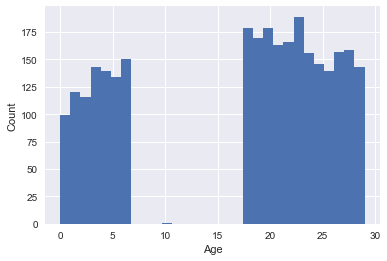

In [16]:
plt.hist(nan[nan['age']<30]['age'], bins=30)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

It seems like there is almost no one between the ages of 6 to 18, meaning that these null values are because these individuals are not in school. Therefore we can fill these values in as 0.

In [17]:
train['rez_esc']=train['rez_esc'].fillna(0)

feature engineering: create new column: school age or not

### `v18q1`

This variable refers to the number of tablets a household owns. Probably null because these households just don't own tablets.

In [18]:
train[train['v18q1'].isnull()][['v18q1', 'v18q']].head(20)

,v18q1,v18q
ID_279628684,NaN,0
ID_68de51c94,NaN,0
ID_3e04e571e,NaN,0
ID_1284f8aad,NaN,0
ID_51f52fdd2,NaN,0
ID_db44f5c59,NaN,0
ID_de822510c,NaN,0
ID_d94071d7c,NaN,0
ID_0a39e419e,NaN,0
ID_4ff51f90c,NaN,0


In [19]:
nan = train[train['v18q1'].isnull()]
print('Households with tablets: ', sum(nan.v18q))

Households with tablets:  0


There we go. Let's fill these in with 0.

In [20]:
train['v18q1'] = train['v18q1'].fillna(0)

### `v2a1`

This refers to the monthly rent the individual pays for their household. Could be related to their specific housing situation.

In [21]:
housing_nan = train[train['v2a1'].isnull()][['v2a1', 'tipovivi1', 'tipovivi2', 'tipovivi3', 'tipovivi4', 'tipovivi5']]
housing_nan.sample(10)

,v2a1,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5
ID_76174fb5f,NaN,1,0,0,0,0
ID_7b2fbca30,NaN,0,0,0,1,0
ID_198c1156b,NaN,1,0,0,0,0
ID_37a14e7b8,NaN,1,0,0,0,0
ID_f8f357aae,NaN,1,0,0,0,0
ID_17458379a,NaN,1,0,0,0,0
ID_a38cf6d77,NaN,1,0,0,0,0
ID_6e3e4548b,NaN,1,0,0,0,0
ID_d2b9dd137,NaN,1,0,0,0,0
ID_6d140be29,NaN,1,0,0,0,0


In [22]:
housing_nan.sum()

v2a1            0.0
tipovivi1    5911.0
tipovivi2       0.0
tipovivi3       0.0
tipovivi4     163.0
tipovivi5     786.0
dtype: float64

5911 of these records own houses, 163 are precarious, and 786 are other. Where the households that own homes, we can fill these in with 0.

For precarious and other, we can fill these in with the median rent.

In [23]:
v2a1 = train['v2a1'].sort_values()
med = v2a1.median()
train.loc[(train['tipovivi1']==1), 'v2a1'] = 0
train.loc[(train['tipovivi4']==1), 'v2a1'] = med
train.loc[(train['tipovivi5']==1), 'v2a1'] = med

### `SQBmeaned` and `meaneduc` ?

* `meaneduc` = average years of education for adults (18+)
* `SQBmeaned` = square of the mean years of education of adults (>=18) in the household

In [24]:
train[['meaneduc']].head(10)

,meaneduc
ID_279628684,10.0
ID_f29eb3ddd,12.0
ID_68de51c94,11.0
ID_d671db89c,11.0
ID_d56d6f5f5,11.0
ID_ec05b1a7b,11.0
ID_e9e0c1100,11.0
ID_3e04e571e,10.0
ID_1284f8aad,10.0
ID_51f52fdd2,10.0


In [25]:
train[train['meaneduc'].isnull()][['idhogar', 'age', 'tamviv', 'rez_esc', 'escolari', 'meaneduc', 'SQBmeaned']]

,idhogar,age,tamviv,rez_esc,escolari,meaneduc,SQBmeaned
ID_bd8e11b0f,1b31fd159,18,1,0.0,10,NaN,NaN
ID_46ff87316,a874b7ce7,18,2,0.0,6,NaN,NaN
ID_69f50bf3e,a874b7ce7,18,2,0.0,4,NaN,NaN
ID_db3168f9f,faaebf71a,19,2,0.0,12,NaN,NaN
ID_2a7615902,faaebf71a,19,2,0.0,12,NaN,NaN


These are only 3 houses and none of the household members are probably still in school. Looking at `tamviv` they are the only members in their household. We can just take the mean of `escolari` for each household and put it into `meaneduc` then `SQBmeaned`.

In [26]:
meaneduc_nan=train[train['meaneduc'].isnull()][['Id','idhogar','escolari']]
me=meaneduc_nan.groupby('idhogar')['escolari'].mean().reset_index()
me

,idhogar,escolari
0,1b31fd159,10
1,a874b7ce7,5
2,faaebf71a,12


In [27]:
for row in meaneduc_nan.iterrows():
    idx=row[0]
    idhogar=row[1]['idhogar']
    m=me[me['idhogar']==idhogar]['escolari'].tolist()[0]
    train.at[idx, 'meaneduc']=m
    train.at[idx, 'SQBmeaned']=m*m

In [28]:
nullval = train.isnull().sum().to_frame().sort_values(0, ascending = False)
nullval.head(10)

,0
Id,0
hogar_mayor,0
parentesco10,0
parentesco11,0
parentesco12,0
idhogar,0
hogar_nin,0
hogar_adul,0
hogar_total,0
parentesco8,0


#### *All missing values accounted for.*

## *Data Wrangling*

Replace `int` `Target` values with the `str` values.

In [29]:
train1 = train.copy()
train1['Target'].replace([1,2,3,4],['Extreme Poverty','Moderate Poverty','Vulnerable','Non Vulnerable'],inplace=True)

In [54]:
train1[['Target', 'v2a1', 'tipovivi1', 'tipovivi2', 'tipovivi3', 'tipovivi4', 'tipovivi5']].sample(10)

,Target,v2a1,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5
ID_c0643d581,Non Vulnerable,300000.0,0,0,1,0,0
ID_6f2bbdf1a,Extreme Poverty,80000.0,0,0,1,0,0
ID_4ab721bc2,Moderate Poverty,130000.0,0,0,0,0,1
ID_f23811c6b,Non Vulnerable,0.0,1,0,0,0,0
ID_196320150,Extreme Poverty,0.0,1,0,0,0,0
ID_cc61ceae0,Non Vulnerable,200000.0,0,0,1,0,0
ID_e6d877532,Vulnerable,0.0,1,0,0,0,0
ID_3c524a670,Non Vulnerable,130000.0,0,0,0,0,1
ID_4be22949b,Moderate Poverty,0.0,1,0,0,0,0
ID_bd2faa01c,Moderate Poverty,200000.0,0,0,1,0,0


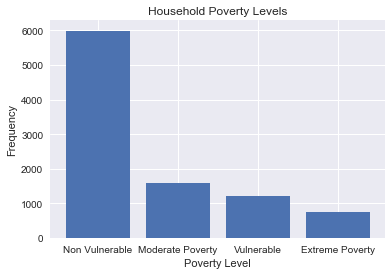

In [52]:
target = train1['Target'].value_counts().to_frame()
levels = train1['Target'].unique()
plt.bar(levels, target.Target, align='center')
plt.xlabel('Poverty Level')
plt.ylabel('Frequency')
plt.title('Household Poverty Levels')
plt.show()

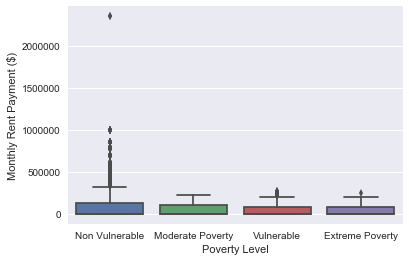

In [31]:
#boxplot
sns.boxplot(x='Target', y='v2a1', data=train1, )
plt.xlabel('Poverty Level')
plt.ylabel('Monthly Rent Payment ($)')
plt.show()

We see we have two outstanding outliers in Non Vulnerable. Also a lot of records where the housing situation is 'owned', 'precarious', and 'other'. Let's get rid of these records. to get a better look at the distribution.

In [70]:
train1 = train1[train1['v2a1'] < 2000000]
train2 = train1[train1['v2a1'] > 0]
train2 = train2[(train2['tipovivi3']==1)]

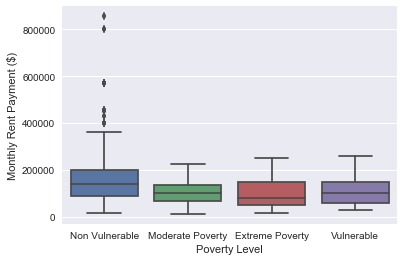

In [62]:
#boxplot
sns.boxplot(x='Target', y='v2a1', data=train2)
plt.xlabel('Poverty Level')
plt.ylabel('Monthly Rent Payment ($)')
plt.show()

In [63]:
#Monthly rent summary for each poverty level
for i in train2['Target'].unique():
    print(i)
    print(train2[train2['Target'] == i]['v2a1'].describe())
    print()

Non Vulnerable
count      1097.000000
mean     161623.758432
std      113579.985009
min       16000.000000
25%       90000.000000
50%      140000.000000
75%      200000.000000
max      855810.000000
Name: v2a1, dtype: float64

Moderate Poverty
count       287.000000
mean     101443.243902
std       48566.670652
min       12000.000000
25%       65000.000000
50%      100000.000000
75%      135000.000000
max      225000.000000
Name: v2a1, dtype: float64

Extreme Poverty
count       127.000000
mean      94751.094488
std       50424.356072
min       15000.000000
25%       50000.000000
50%       80000.000000
75%      150000.000000
max      249896.000000
Name: v2a1, dtype: float64

Vulnerable
count       225.000000
mean     108655.235556
std       54527.478909
min       30000.000000
25%       60000.000000
50%      100000.000000
75%      150000.000000
max      260000.000000
Name: v2a1, dtype: float64



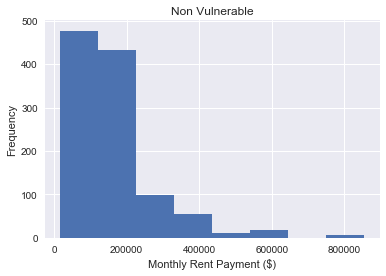

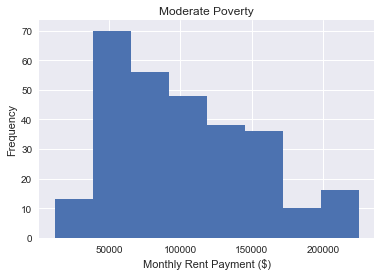

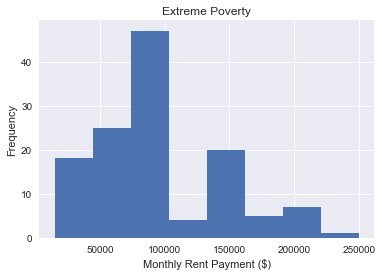

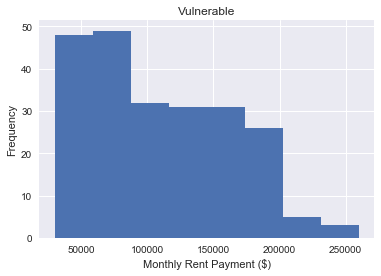

In [73]:
for i in train2['Target'].unique():
    plt.hist(train2[train2['Target'] == i]['v2a1'], bins=8, align='mid')
    plt.xlabel('Monthly Rent Payment ($)')
    plt.ylabel('Frequency')
    plt.title(i)
    plt.show()


### Is there  a significant difference among the mean monthly rent of each poverty level?

The mean for non vulnerable households is definitely significantly larger than the other means. But what about among vulnerable, moderate poverty, and extreme poverty?

We will perform a hypothesis test using a t test. 

**Null Hypothesis** : There is NO significant difference between the means.

Alpha = 0.05

In [74]:
#vulnerable
meanV = np.mean(train2[train2['Target'] == 'Vulnerable']['v2a1'])
print('Vulnerable Mean Rent: ', meanV)

#moderate
meanM = np.mean(train2[train2['Target'] == 'Moderate Poverty']['v2a1'])
print('Moderate Mean Rent: ', meanM)

#extreme
meanE = np.mean(train2[train2['Target'] == 'Extreme Poverty']['v2a1'])
print('Extreme Mean Rent: ', meanE)

#total
meanTot = np.mean(train2['v2a1'])
print('Mean Rent of Total: ', meanTot)

Vulnerable Mean Rent:  108655.23555555556
Moderate Mean Rent:  101443.24390243902
Extreme Mean Rent:  94751.09448818897
Mean Rent of Total:  139917.21831797235


In [66]:
#vulnerable and moderate
from scipy import stats
tstat, p = stats.ttest_ind(train2[train2['Target'] == 'Vulnerable']['v2a1'],train2[train2['Target'] == 'Moderate Poverty']['v2a1'])
print('T Stat: ', tstat)
print('P-Value: ', p)

T Stat:  1.5797475452468637
P-Value:  0.11478467532554162


We fail to reject the null hypothesis as our p-value here is greater than alpha. There is not a significant difference between the mean montly rent of the vulnerable level and moderate level.

In [75]:
#moderate and extreme
tstat, p = stats.ttest_ind(train2[train2['Target'] == 'Moderate Poverty']['v2a1'],train2[train2['Target'] == 'Extreme Poverty']['v2a1'])
print('T Stat: ', tstat)
print('P-Value: ', p)

T Stat:  1.277771531367256
P-Value:  0.20204947921858263


We fail to reject the null hypothesis as our p-value here is greater than alpha. There is not a significant difference between the mean montly rent of the moderate level and extreme level.

#### Conclusion
Monthly rent isn't really a good indicator for what poverty level someone is, as there isn't a significant difference among the means for vulnerable, moderate, and extreme poverty.

### Rooms

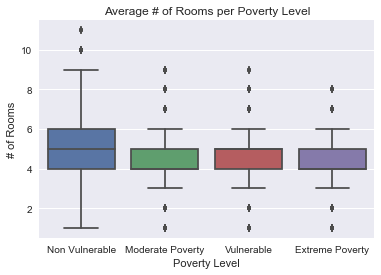

In [40]:
mean_rooms = train1.groupby(['Target']).mean()['rooms']
#boxplot
_ = sns.boxplot(x='Target', y='rooms', data=train1)
plt.xlabel('Poverty Level')
plt.ylabel('# of Rooms')
plt.title('Average # of Rooms per Poverty Level')
plt.show()

Tells deviation on the mean

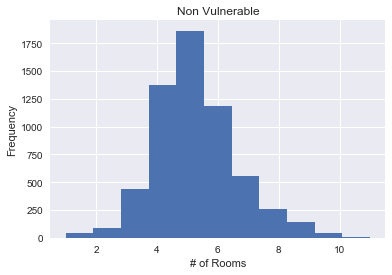

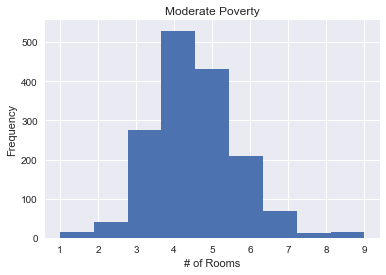

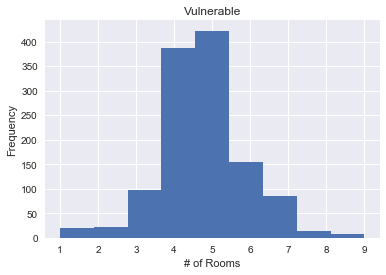

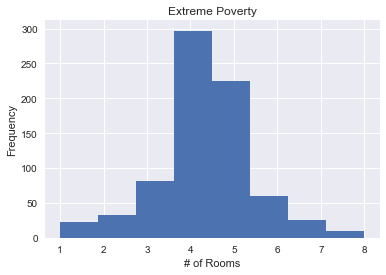

In [41]:
for i in train1['Target'].unique():
    bins = len(train1[train1['Target'] == i]['rooms'].unique())
    
    plt.hist(train1[train1['Target'] == i]['rooms'], bins=bins, align='mid')
    plt.xlabel('# of Rooms')
    plt.ylabel('Frequency')
    plt.title(i)
    plt.show()


Make a function for these histograms

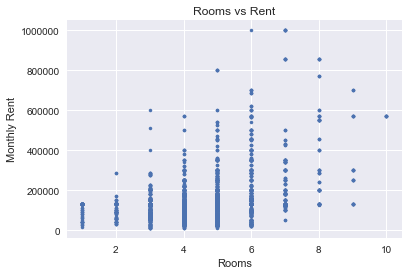

In [42]:
#scatterplot
plt.plot(train2['rooms'], train2['v2a1'], marker = '.', linestyle = 'none')
plt.xlabel('Rooms')
plt.ylabel('Monthly Rent')
plt.title('Rooms vs Rent')
plt.show()

### Education

escolari, years of schooling

rez_esc, Years behind in school

edjefe, years of education of male head of household, based on the interaction of escolari (years of education), head 
of household and gender, yes=1 and no=0

edjefa, years of education of female head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0

meaneduc, average years of education for adults (18+)

instlevel1, =1 no level of education

instlevel2, =1 incomplete primary

instlevel3, =1 complete primary

instlevel4, =1 incomplete academic secondary level

instlevel5, =1 complete academic secondary level

instlevel6, =1 incomplete technical secondary level

instlevel7, =1 complete technical secondary level

instlevel8, =1 undergraduate and higher education

instlevel9, =1 postgraduate higher education


Let's combine the different education levels into one column: `instlevel`

In [43]:
education = train1[['Id','male', 'female','idhogar','escolari', 'rez_esc', 'edjefe', 'edjefa', 'meaneduc', 'instlevel1', 'instlevel2', 'instlevel3', 'instlevel4', 'instlevel5', 'instlevel6', 'instlevel7', 'instlevel8', 'instlevel9']].groupby('idhogar')
education.head(10)

,Id,male,female,idhogar,escolari,rez_esc,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9
ID_279628684,ID_279628684,1,0,21eb7fcc1,10,0.0,10,no,10.000000,0,0,0,1,0,0,0,0,0
ID_f29eb3ddd,ID_f29eb3ddd,1,0,0e5d7a658,12,0.0,12,no,12.000000,0,0,0,0,0,0,0,1,0
ID_68de51c94,ID_68de51c94,0,1,2c7317ea8,11,0.0,no,11,11.000000,0,0,0,0,1,0,0,0,0
ID_d671db89c,ID_d671db89c,1,0,2b58d945f,9,1.0,11,no,11.000000,0,0,0,1,0,0,0,0,0
ID_d56d6f5f5,ID_d56d6f5f5,0,1,2b58d945f,11,0.0,11,no,11.000000,0,0,0,0,1,0,0,0,0
ID_ec05b1a7b,ID_ec05b1a7b,1,0,2b58d945f,11,0.0,11,no,11.000000,0,0,0,0,1,0,0,0,0
ID_e9e0c1100,ID_e9e0c1100,0,1,2b58d945f,2,0.0,11,no,11.000000,0,1,0,0,0,0,0,0,0
ID_3e04e571e,ID_3e04e571e,0,1,d6dae86b7,0,0.0,9,no,10.000000,1,0,0,0,0,0,0,0,0
ID_1284f8aad,ID_1284f8aad,1,0,d6dae86b7,9,0.0,9,no,10.000000,0,0,0,1,0,0,0,0,0
ID_51f52fdd2,ID_51f52fdd2,0,1,d6dae86b7,11,0.0,9,no,10.000000,0,0,0,0,1,0,0,0,0


`edjefe` and `edjefa` is determined by who has the highest education level. It seems it has both 'no' and int values.

In [44]:
educlevels = ['instlevel1', 'instlevel2', 'instlevel3', 'instlevel4', 'instlevel5', 'instlevel6', 'instlevel7', 'instlevel8', 'instlevel9']

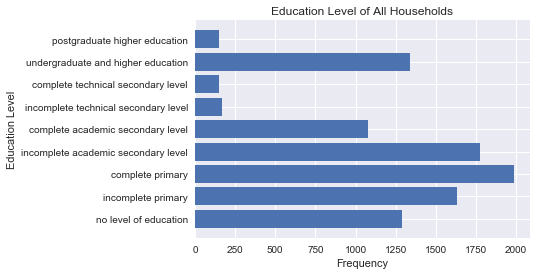

In [45]:
instlevel = [train['instlevel1'].sum(), train['instlevel2'].sum(), train['instlevel3'].sum(), train['instlevel4'].sum(), train['instlevel5'].sum(), train['instlevel6'].sum(), train['instlevel7'].sum(), train['instlevel8'].sum(), train['instlevel9'].sum()]
inststr = ['no level of education', 'incomplete primary', 'complete primary', 'incomplete academic secondary level', 'complete academic secondary level', 'incomplete technical secondary level', 'complete technical secondary level', 'undergraduate and higher education', 'postgraduate higher education']
inst = ['1', '2', '3', '4', '5', '6', '7', '8', '9']
plt.barh(inststr, instlevel)
plt.ylabel('Education Level')
plt.xlabel('Frequency')
plt.title('Education Level of All Households')
plt.show()

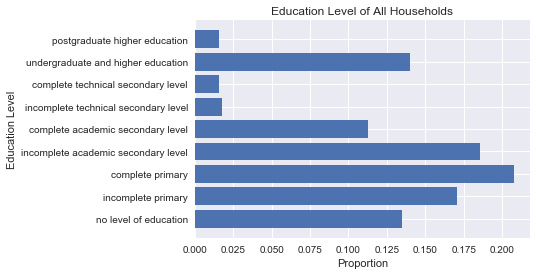

In [46]:
instlevelp = []
total = len(train)
for x in instlevel:
    instlevelp.append(x/total)

#proportion barplot
plt.barh(inststr, instlevelp)
plt.ylabel('Education Level')
plt.xlabel('Proportion')
plt.title('Education Level of All Households')
plt.show()

* About 13% of households have no level of education.
* Over 20% of households have completed primary school. 
* About 11% have completed academic secondary level. 
* Less than 2% have attended and completed technical secondary level. 
* Over 13% have completed undergraduate and higher education. 
* Less than 2% have completed postgraduate higher education.

#### Education among adults >18?

Number of Adults:  7026


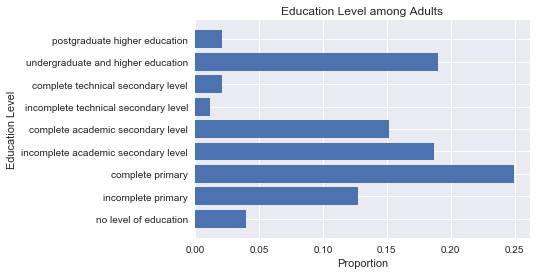

In [47]:
adults = train[train['age'] >= 18]
print('Number of Adults: ', len(adults))
instlevela = []
for x in educlevels:
    instlevela.append(adults[x].sum())

prop = []
for x in instlevela:
    prop.append(x/len(adults))

#barplot
plt.barh(inststr, prop)
plt.ylabel('Education Level')
plt.xlabel('Proportion')
plt.title('Education Level among Adults')
plt.show()

Out of adults:

* About 25% completed primary school
* About 15% completed academic level
* Less than 2% attended and completed technical secondary
* About 18-19% completed undergraduate and higher education
* About 2% completed postgraduate higher education

#### Education and Target

In [ ]:
#put education levels in one column


### Age

### Housing Situation

### Wall Material

### Floor Material

### Roof Material

### Wall, Floor, and Roof Quality

### Region

In [76]:
train1.to_csv('train1.csv')